###### AIM: 
The goal of the project "Analyzing Series Using Netflix Dataset" is to learn more about series by using the 
Netflix dataset that is already available. The study focuses on analyzing many facets of the show, such as 
viewer engagement, user preferences, and series features

In [46]:
## Import Libraries

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

from sqlalchemy import create_engine, inspect


In [47]:


# Load Netflix dataset into a DataFrame (assuming it's in a CSV file)
df_netflix = pd.read_csv("C:/Users/aksha/Downloads/netflix_titles.csv/netflix_titles.csv")

# Create a SQLite database engine
engine = create_engine('sqlite:///netflix.db')

# Export the DataFrame as a table 'netflix' to the SQLite engine
df_netflix.to_sql("netflix", con=engine, if_exists='replace')



8807

### DATA CLEANING 

In [48]:
# Checking the null values

df_netflix.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Replacing the null values with unrated for rating column and unknown for other columns

df_netflix["director"].fillna("unknown", inplace = True)
df_netflix["cast"].fillna("unknown", inplace = True)
df_netflix["country"].fillna("unknown", inplace = True)
df_netflix["date_added"].fillna("unknown", inplace = True)
df_netflix["rating"].fillna("unrated", inplace = True)
df_netflix["duration"].fillna("unknown", inplace = True)



In [8]:
# Checking the table

df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [9]:
df_netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

The null values have been replaced

### ANALYSING THE DATA

In [10]:
## print the columns of all dataframes

print('The columns of the Netflix data frame are :-  ',df_netflix.columns)

The columns of the Netflix data frame are :-   Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [11]:
# Checking list of movies released after 2020

sql='''

Select 
distinct(title) from netflix
where release_year >2020



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(8807)

,title
0,Blood & Water
1,Ganglands
2,Jailbirds New Orleans
3,Kota Factory
4,Midnight Mass
...,...
587,What Happened to Mr. Cha?
588,Hilda
589,Polly Pocket
590,Love Is Blind


In [12]:
## Displaying the titles in alphabetical order

sql='''

Select 
distinct(title) as name from netflix
order by title 


''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(8807)

,name
0,#Alive
1,#AnneFrank - Parallel Stories
2,#FriendButMarried
3,#FriendButMarried 2
4,#Roxy
...,...
8802,忍者ハットリくん
8803,海的儿子
8804,마녀사냥
8805,반드시 잡는다


In [13]:
## Getting the frequency of release years

sql='''

Select
min(release_year) as min_release_year,
max(release_year) as max_release_year,
count(distinct release_year) as count_of_release_year
from netflix
limit 1



''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,min_release_year,max_release_year,count_of_release_year
0,1925,2021,74


In [14]:
#Sorting the release_years in asec order
sql = '''
    SELECT
        title,
        release_year
    FROM
        netflix
    WHERE
        release_year > 1924
    ORDER BY
        release_year ASC
'''

df_sql = pd.read_sql_query(sql, con=engine)
df_sql.head(8807)

,title,release_year
0,Pioneers: First Women Filmmakers*,1925
1,Prelude to War,1942
2,The Battle of Midway,1942
3,Undercover: How to Operate Behind Enemy Lines,1943
4,Why We Fight: The Battle of Russia,1943
...,...,...
8802,What Happened to Mr. Cha?,2021
8803,Hilda,2021
8804,Polly Pocket,2021
8805,Love Is Blind,2021


### DATA VISUALIZATION

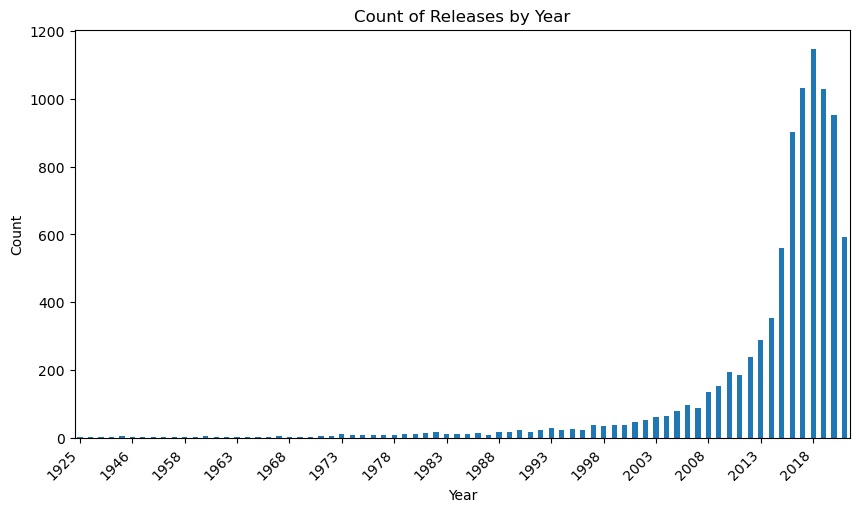

Number of releases in 1925 year: 1
Number of releases in 1942 year: 2
Number of releases in 1943 year: 3
Number of releases in 1944 year: 3
Number of releases in 1945 year: 4
Number of releases in 1946 year: 2
Number of releases in 1947 year: 1
Number of releases in 1954 year: 2
Number of releases in 1955 year: 3
Number of releases in 1956 year: 2
Number of releases in 1958 year: 3
Number of releases in 1959 year: 1
Number of releases in 1960 year: 4
Number of releases in 1961 year: 1
Number of releases in 1962 year: 3
Number of releases in 1963 year: 2
Number of releases in 1964 year: 2
Number of releases in 1965 year: 2
Number of releases in 1966 year: 1
Number of releases in 1967 year: 5
Number of releases in 1968 year: 3
Number of releases in 1969 year: 2
Number of releases in 1970 year: 2
Number of releases in 1971 year: 5
Number of releases in 1972 year: 5
Number of releases in 1973 year: 10
Number of releases in 1974 year: 7
Number of releases in 1975 year: 7
Number of releases 

In [15]:
import matplotlib.pyplot as plt

# Convert the release year column to its original values
df_sql['release_year'] = df_sql['release_year'].astype(int)

# Count the number of releases per year
release_counts = df_sql['release_year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
release_counts.plot(kind='bar')

plt.title('Count of Releases by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.xticks(range(0, len(release_counts), 5))
plt.subplots_adjust(bottom=0.2)

plt.show()

# Print the number of releases per each year
for year, count in release_counts.items():
    print(f"Number of releases in {year} year: {count}")



In [16]:
sql='''

select title from netflix where rating in ('PG-13','TV-MA','NC-17','TV-Y','TV-14')

''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(8807)

,title
0,Dick Johnson Is Dead
1,Blood & Water
2,Ganglands
3,Jailbirds New Orleans
4,Kota Factory
...,...
6162,اشتباك
6163,Zed Plus
6164,Zenda
6165,Zinzana


In [17]:
## Distribution of shows in country

sql='''

select
sum(case when country='India' then 1 else 0 end) as Shows_in_India,
sum(case when country='United States' then 1 else 0 end) as Shows_in_United_States,
sum(case when country='South Africa' then 1 else 0 end) as Shows_in_South_Africa,
sum(case when country='South Korea' then 1 else 0 end) as Shows_in_South_Korea,
sum(case when country='China' then 1 else 0 end) as Shows_in_China,
sum(case when country='Japan' then 1 else 0 end) as Shows_in_Japan,
sum(case when country='Italy' then 1 else 0 end) as Shows_in_Italy
from netflix

''';

    
df_sql = pd.read_sql_query(sql,con=engine)
print(df_sql)

   Shows_in_India  Shows_in_United_States  Shows_in_South_Africa  \
0             972                    2818                     30   

   Shows_in_South_Korea  Shows_in_China  Shows_in_Japan  Shows_in_Italy  
0                   199              66             245              45  


In [45]:
import pandas as pd
import plotly.graph_objects as go

# Load Netflix dataset into a DataFrame (assuming it's in a CSV file)
df_netflix = pd.read_csv("C:/Users/aksha/Downloads/netflix_titles.csv/netflix_titles.csv")

# Calculate the counts by country
country_counts = df_netflix['country'].value_counts()

# Extract the country labels and counts for the top 10 countries
top_10_countries = country_counts.head(10)
labels = top_10_countries.index.tolist()
sizes = top_10_countries.values.tolist()

# Create the choropleth map data
data = dict(
    type='choropleth',
    locations=labels,
    locationmode='country names',
    z=sizes,
    colorscale='purpor',
    text=labels,
    colorbar=dict(title='Number of Shows')
)

# Define the layout for the choropleth map
layout = dict(
    title='Distribution of Shows by Country (Top 10)',
    geo=dict(showframe=False, projection={'type': 'natural earth'})
)

# Create the choropleth figure
fig = go.Figure(data=data, layout=layout)

# Display the choropleth map
fig.show()

# Print the top 10 countries with the highest number of shows
print("Top 10 Countries with the Highest Number of Shows:")
for country, count in zip(labels, sizes):
    print(f"{country}: {count} shows")


Top 10 Countries with the Highest Number of Shows:
United States: 2818 shows
India: 972 shows
United Kingdom: 419 shows
Japan: 245 shows
South Korea: 199 shows
Canada: 181 shows
Spain: 145 shows
France: 124 shows
Mexico: 110 shows
Egypt: 106 shows


ValueError: could not convert string to float: 'United States'

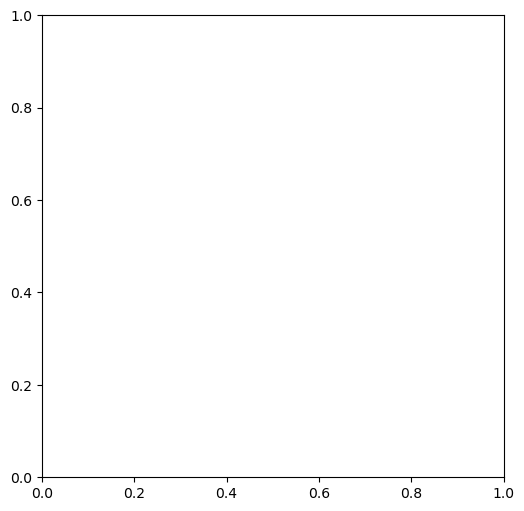

In [25]:
import matplotlib.pyplot as plt

# Plot of distribution of shows
df_sql = pd.read_sql_query(sql, con=engine)

# Creating data for the pie chart
labels = ['India', 'United States', 'South Africa', 'South Korea', 'China', 'Japan', 'Italy']
sizes = df_sql.iloc[0].values

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
ax.set_title('Distribution of Shows by Country')

# Display the pie chart
plt.show()




C:\Users\aksha\AppData\Local\Temp\ipykernel_1784\3849404792.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


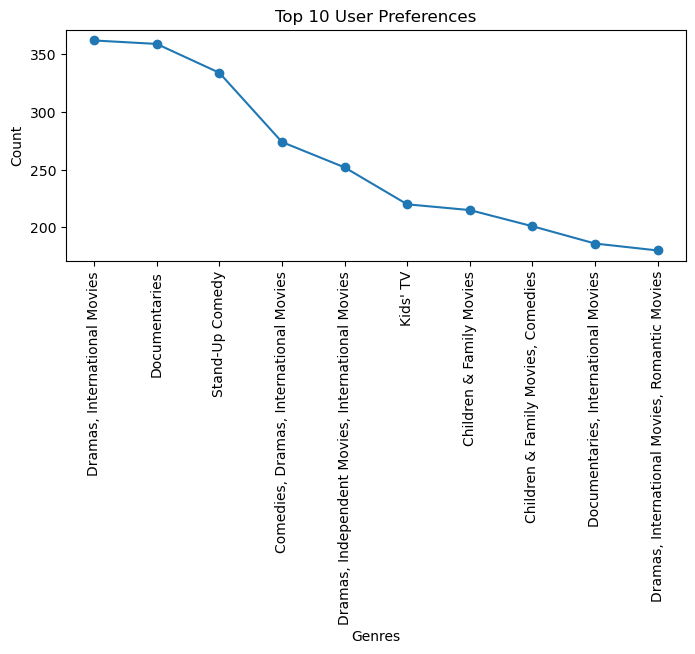

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

inspector = inspect(engine)
if not inspector.has_table('netflix'):
    # Store the DataFrame in the SQLite database
    df_netflix.to_sql('netflix', con=engine)

# Query: Gather information about user preferences
df_genre = pd.read_sql_query("SELECT listed_in, COUNT(*) as count FROM netflix GROUP BY listed_in ORDER BY count DESC LIMIT 10", con=engine)

# Line graph for top 10 user preferences
plt.figure(figsize=(8, 3))
plt.plot(df_genre['listed_in'], df_genre['count'], marker='o')
plt.title('Top 10 User Preferences')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



-->It gathers information about user preferences by analyzing the genres listed in the dataset. This helps in understanding the types of shows that are popular among users and can be used to improve the recommendation algorithm.




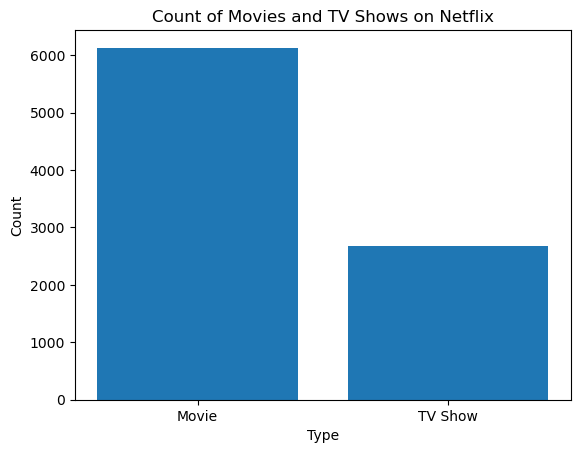

Movie: 6131
TV Show: 2676


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('netflix.db')

# Define the SQL query to retrieve the count of movies and TV shows
sql = '''
SELECT type, COUNT(*) AS count
FROM netflix
GROUP BY type;
'''

# Execute the SQL query and fetch the results into a DataFrame
df_type = pd.read_sql_query(sql, conn)

# Close the database connection
conn.close()

# Plot the count of movies and TV shows
plt.bar(df_type['type'], df_type['count'])
plt.title('Count of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Print the number for each type
for index, row in df_type.iterrows():
    print(f"{row['type']}: {row['count']}")


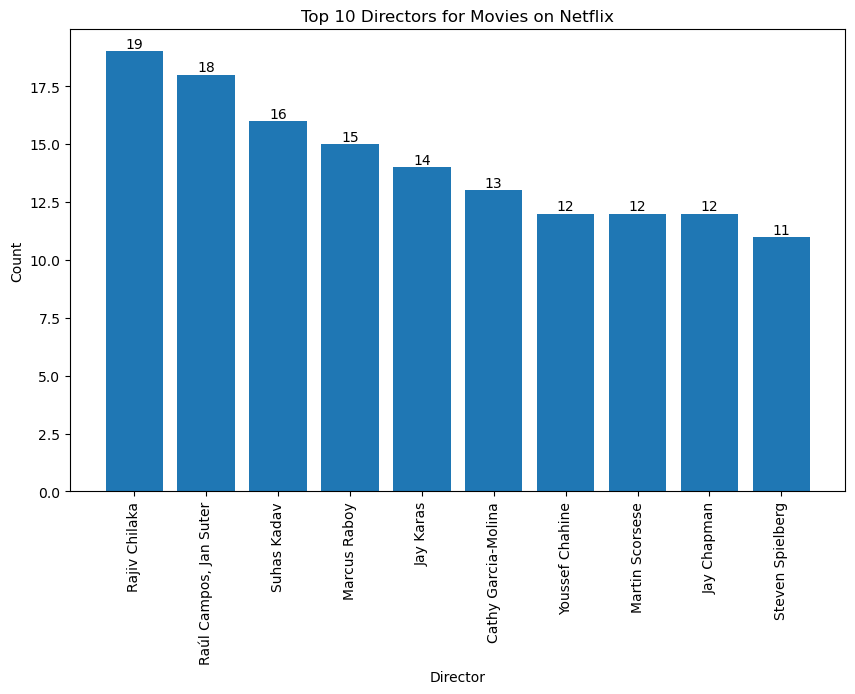

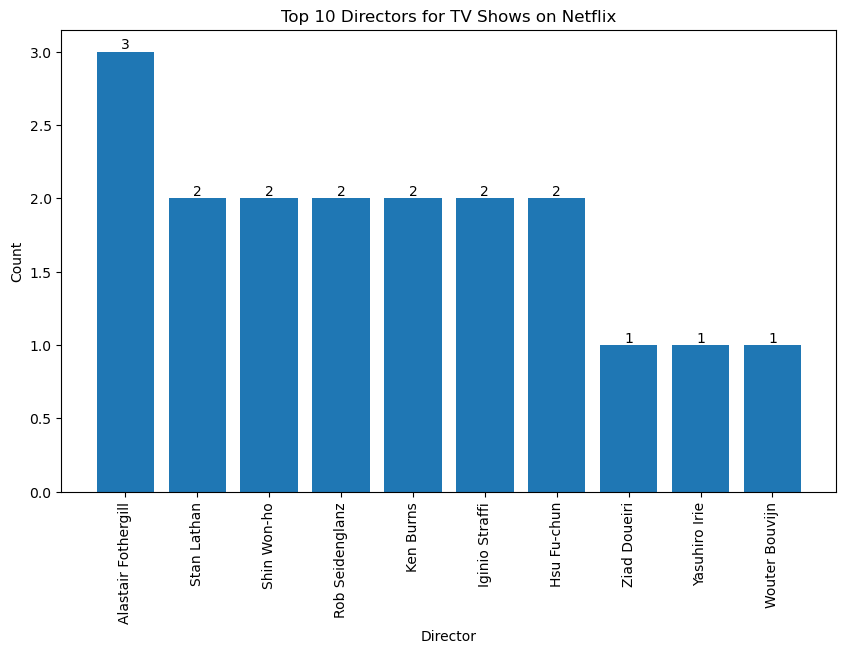

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('netflix.db')

# Define the SQL queries to retrieve the top 10 directors for movies and TV shows
sql_movies = '''
SELECT director, COUNT(*) AS count
FROM netflix
WHERE type = 'Movie' AND director IS NOT NULL AND director NOT LIKE '%unknown%'
GROUP BY director
ORDER BY count DESC
LIMIT 10;
'''

sql_tv_shows = '''
SELECT director, COUNT(*) AS count
FROM netflix
WHERE type = 'TV Show' AND director IS NOT NULL AND director NOT LIKE '%unknown%'
GROUP BY director
ORDER BY count DESC
LIMIT 10;
'''

# Execute the SQL queries and fetch the results into DataFrames
df_movies = pd.read_sql_query(sql_movies, conn)
df_tv_shows = pd.read_sql_query(sql_tv_shows, conn)

# Close the database connection
conn.close()

# Plot the top 10 directors for movies
plt.figure(figsize=(10, 6))
plt.bar(df_movies['director'], df_movies['count'])
plt.title('Top 10 Directors for Movies on Netflix')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Print the values on the bars
for i, count in enumerate(df_movies['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# Plot the top 10 directors for TV shows
plt.figure(figsize=(10, 6))
plt.bar(df_tv_shows['director'], df_tv_shows['count'])
plt.title('Top 10 Directors for TV Shows on Netflix')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Print the values on the bars
for i, count in enumerate(df_tv_shows['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [29]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('netflix.db')

# Define the SQL query to retrieve the types of ratings
sql = '''
SELECT DISTINCT rating
FROM netflix;
'''

# Execute the SQL query and fetch all the results
results = conn.execute(sql).fetchall()

# Close the database connection
conn.close()

# Print the types of ratings
print("Types of Ratings:")
for result in results:
    print(result[0])



Types of Ratings:
PG-13
TV-MA
PG
TV-14
TV-PG
TV-Y
TV-Y7
R
TV-G
G
NC-17
74 min
84 min
66 min
NR
None
TV-Y7-FV
UR


TypeError: 'value' must be an instance of str or bytes, not a None

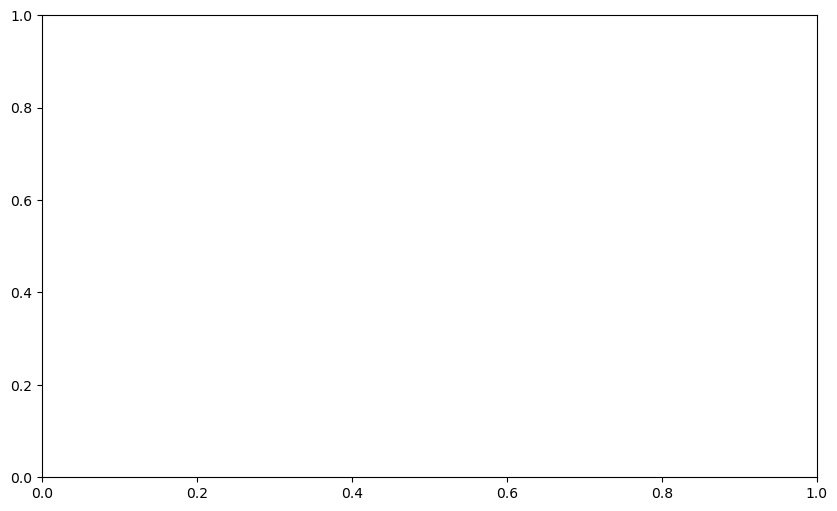

In [31]:
# Connect to the SQLite database
conn = sqlite3.connect('netflix.db')

# Define the ratings to plot
ratings = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', 'NR', 'unrated', 'TV-Y7-FV', 'UR']

# Define the SQL query to retrieve the count of ratings for each country
sql = f'''
SELECT country, {", ".join(f"SUM(CASE WHEN rating = '{rating}' THEN 1 ELSE 0 END) AS {rating.replace('-', '_').replace(' ', '_').replace('.', '_')}" for rating in ratings)}
FROM netflix
GROUP BY country
ORDER BY SUM(CASE WHEN rating = 'PG-13' THEN 1 ELSE 0 END) DESC
LIMIT 10;
'''

# Execute the SQL query and fetch the results into a DataFrame
df_countries_ratings = pd.read_sql_query(sql, conn)

# Close the database connection
conn.close()

# Set the country column as the index
df_countries_ratings.set_index('country', inplace=True)

# Transpose the DataFrame to have ratings as columns and countries as rows
df_transposed = df_countries_ratings.transpose()

# Filter out the ratings that have zero count in all countries
df_filtered = df_transposed.loc[df_transposed.sum(axis=1) > 0]

# Remove the "unknown" column if present
if "unknown" in df_filtered.columns:
    df_filtered.drop(columns="unknown", inplace=True)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for rating in df_filtered.index:
    plt.scatter(df_filtered.columns, df_filtered.loc[rating], label=rating)
plt.title('Count of Ratings by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=90)
plt.legend()
plt.show()









<Figure size 1000x600 with 0 Axes>

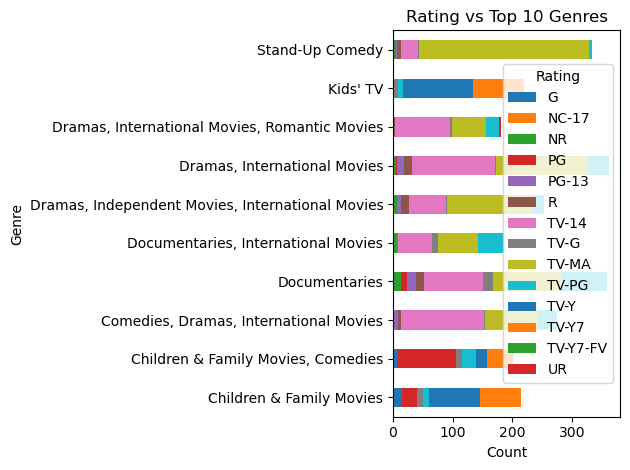

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('netflix.db')

# Define the SQL query to retrieve the count of genres for each rating
sql = '''
SELECT rating, 
       listed_in AS genre, 
       COUNT(*) AS count
FROM netflix
GROUP BY rating, genre;
'''

# Execute the SQL query and fetch the results into a DataFrame
df_rating_genre = pd.read_sql_query(sql, conn)

# Close the database connection
conn.close()

# Calculate the total count of each genre
df_genre_count = df_rating_genre.groupby('genre')['count'].sum().nlargest(10)

# Filter the DataFrame to include only the top 10 genres
df_top_genres = df_rating_genre[df_rating_genre['genre'].isin(df_genre_count.index)]

# Pivot the DataFrame to have genres as columns and ratings as rows
df_pivot = df_top_genres.pivot(index='genre', columns='rating', values='count')

# Plot the bar plot
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='barh', stacked=True)
plt.title('Rating vs Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()



In [33]:
# Gather information about viewer engagement
df_engagement = pd.read_sql_query("SELECT title, date_added, description FROM netflix", con=engine)

# Display the first 5 rows of the DataFrame
df_engagement.head()

,title,date_added,description
0,Dick Johnson Is Dead,"September 25, 2021","As her father nears the end of his life, filmm..."
1,Blood & Water,"September 24, 2021","After crossing paths at a party, a Cape Town t..."
2,Ganglands,"September 24, 2021",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,"September 24, 2021","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,"September 24, 2021",In a city of coaching centers known to train I...


Defaulting to user installation because normal site-packages is not writeable


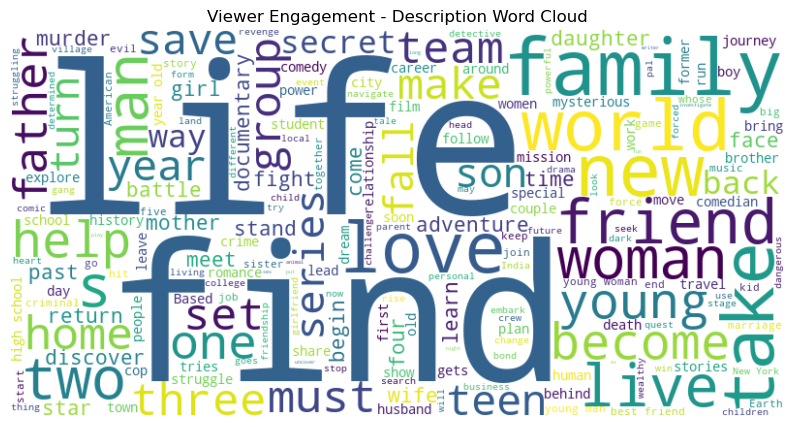

In [34]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Query 3: Gather information about viewer engagement
df_engagement = pd.read_sql_query("SELECT title, date_added, description FROM netflix", con=engine)

# Combine all descriptions into a single string
descriptions = ' '.join(df_engagement['description'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Viewer Engagement - Description Word Cloud')
plt.axis('off')
plt.show()

-->It gathers information about viewer engagement by capturing the title, date added, and description of the shows. This data can provide insights into which shows are attracting viewer attention and can be used to further refine the recommendation algorithm.

###### By leveraging the Netflix dataset and performing these analyses, the project aims to enhance the user experience on the Netflix platform. It aligns with the objective of improving content recommendations and increasing customer satisfaction. The findings from these analyses can help Netflix offer relevant and interesting series ideas to its users, leading to a more personalized and enjoyable streaming experience.